In [ ]:
!pip install PyDrive

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
download = drive.CreateFile({'id': '141ix3l1eT1HNiYDhaaqG1oUmYJ4MLlxi'})

In [ ]:
download.GetContentFile('image-classification-screening.zip')
!unzip image-classification-screening.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Image_026830.jpg  
  inflating: train/Image_026831.jpg  
  inflating: train/Image_026832.jpg  
  inflating: train/Image_026833.jpg  
  inflating: train/Image_026834.jpg  
  inflating: train/Image_026835.jpg  
  inflating: train/Image_026836.jpg  
  inflating: train/Image_026837.jpg  
  inflating: train/Image_026838.jpg  
  inflating: train/Image_026839.jpg  
  inflating: train/Image_026840.jpg  
  inflating: train/Image_026841.jpg  
  inflating: train/Image_026842.jpg  
  inflating: train/Image_026843.jpg  
  inflating: train/Image_026844.jpg  
  inflating: train/Image_026845.jpg  
  inflating: train/Image_026846.jpg  
  inflating: train/Image_026847.jpg  
  inflating: train/Image_026848.jpg  
  inflating: train/Image_026849.jpg  
  inflating: train/Image_026850.jpg  
  inflating: train/Image_026851.jpg  
  inflating: train/Image_026852.jpg  
  inflating: train/Image_026853.jpg  
  inflating: train/Image_026854.jpg  

In [ ]:
!pip install fastbook

     |████████████████████████████████| 720 kB 5.0 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 187 kB 46.4 MB/s 
     |████████████████████████████████| 1.2 MB 52.2 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 561 kB 63.3 MB/s 
     |████████████████████████████████| 51 kB 332 kB/s 
     |████████████████████████████████| 130 kB 54.3 MB/s 
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
!pip install fastai --upgrade -q
from fastai.vision.all import *
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from pathlib import Path
import torch 

In [ ]:
import fastai 
fastai.__version__

'2.5.5'

In [ ]:
train = pd.read_csv("train_label.csv")
ss = pd.read_csv("sample_submission.csv")

In [ ]:
train['file_name']=train['file_name'].apply(lambda x: Path(f"train/{x}"))

In [ ]:
train['label'].value_counts()

6     6285
3     4139
9     3933
7     3664
2     2778
5     2433
8     2338
0     2166
4     2052
10    1039
1      922
Name: label, dtype: int64

In [ ]:
train.head()

,file_name,label
0,train/Image_000000.jpg,8
1,train/Image_000001.jpg,8
2,train/Image_000002.jpg,8
3,train/Image_000003.jpg,8
4,train/Image_000004.jpg,8


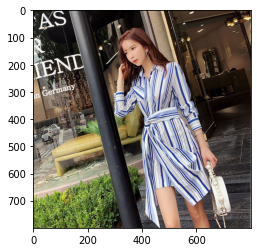

In [ ]:
plt.imshow(plt.imread(train['file_name'][3]))

In [ ]:
tfms = aug_transforms(do_flip = True, flip_vert = False, mult=2.0)
# from fastai.vision.transform import get_transforms

In [ ]:
dls = ImageDataLoaders.from_lists(path = "", fnames = train.file_name, labels = train.label ,val_pct = 0.2,bs=32, item_tfms = [Resize(224,method = ResizeMethod.Squish)])

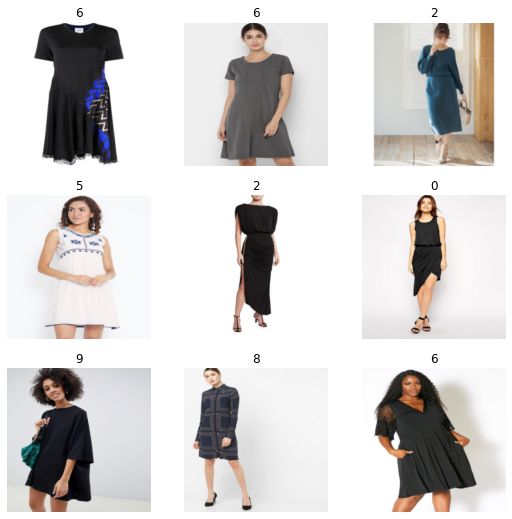

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
learn.fine_tune(10, base_lr=3e-3, freeze_epochs=4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.062966,1.546908,0.274846,0.725154,09:25
1,0.063731,1.598350,0.270436,0.729564,09:22
2,0.059166,1.723136,0.269649,0.730351,09:22
3,0.060235,1.879690,0.274531,0.725469,09:24


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f9379d04b00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f9379d04b00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.079534,1.920943,0.279414,0.720586,09:27
1,0.147180,1.738524,0.284297,0.715703,09:25
2,0.225422,1.461780,0.291699,0.708301,09:24


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.079534,1.920943,0.279414,0.720586,09:27
1,0.147180,1.738524,0.284297,0.715703,09:25
2,0.225422,1.461780,0.291699,0.708301,09:24
3,0.228495,1.252890,0.290754,0.709246,09:24
4,0.174630,1.340043,0.291542,0.708458,09:25
5,0.104527,1.408096,0.277997,0.722003,09:26
6,0.069432,1.455478,0.271854,0.728146,09:27
7,0.040240,1.540157,0.263506,0.736494,09:25
8,0.028231,1.617052,0.262876,0.737124,09:26
9,0.020018,1.610455,0.263349,0.736651,09:31


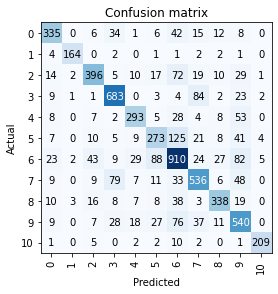

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.dls.vocab

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
ss['file_name'] = ss["file_name"].apply(lambda x : Path(f"test/{x}"))

In [ ]:
learn.test_dl = dls.test_dl(test_items = ss.file_name)

In [ ]:
preds =learn.get_preds(dl = learn.test_dl) 


In [ ]:
preds

(TensorBase([[4.5693e-08, 2.7889e-08, 1.2219e-08,  ..., 1.5873e-09, 4.3741e-06,
          2.3710e-07],
         [1.1424e-04, 6.9059e-06, 8.3198e-05,  ..., 3.0053e-04, 7.4446e-04,
          4.9570e-01],
         [3.0042e-06, 7.2830e-09, 2.0571e-06,  ..., 3.6515e-07, 4.3198e-06,
          2.8104e-07],
         ...,
         [3.1123e-05, 2.4358e-09, 8.0984e-07,  ..., 9.5059e-07, 1.9860e-05,
          9.0153e-07],
         [7.1561e-06, 4.1929e-08, 6.6594e-06,  ..., 2.2675e-07, 9.8100e-01,
          1.6793e-05],
         [2.2023e-08, 5.1060e-08, 1.4009e-05,  ..., 2.1315e-07, 4.3336e-04,
          5.4122e-06]]), None)

In [ ]:
fin_preds = preds[0].argmax(axis = 1)

In [ ]:
fin_preds.numpy()

array([ 4, 10,  6, ...,  3,  9,  4])

In [ ]:
ss= pd.read_csv("sample_submission.csv")

In [ ]:
ss['label'] = fin_preds.numpy()

ss.to_csv('image_classification_submission.csv', index = False)